Разделение двух классов прямой линией(гиперплоскостью в общем случаи).Найти полосу настолько широкой, насколько это возможно. \
Ширина измеряется по ближайшим граничным образцам в классах - **Large margin classification**. \
**Опорные вектора** - линии проведенные через граничные образцы и формирующие ширину полосы.

Методы **SVM** чувствительны к масштабам признаков и нуждаются в масштабировании(`StandardScaler`)

**Hard Margin Classification** - Классификация с жестким зазором 

**Soft Margin Classification** - Классификация с мягким зазором 

**hinge loss** - петлевая функция

**C** - Гиперпараметр\
**dual** - Гиперпараметр


decision_function

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC # Linear support vector classification

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [183]:
iris = load_iris()
X = iris['data'][:, (2,3)]
y = (iris['target']==2).astype('float')
X.shape, y.shape

((150, 2), (150,))

In [47]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [44]:
SVM = Pipeline([
               ('scaler', StandardScaler()),
               ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))
               ])

SVM.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [59]:
SVM.predict([[5.5, 1.7]])

array([1.])

Классу **LinearSVC** аналогичны классы **SVC(kernel='linear')** и **SGDClassifier(loss='hinge')'** 

In [48]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [53]:
scaler = StandardScaler()

svc_linkernel = SVC(kernel='linear', C=1, random_state=42) # Support Vector Classification with Linear-kernel and C
svm_sgd = SGDClassifier(loss='hinge', alpha=0.17, random_state=42) # SGD classifier as SVM(hinge loss)
svm_clf1 = LinearSVC(C=1, loss='hinge', random_state=42) # Linear SV classification wiith C=1
svm_clf100 = LinearSVC(C=100, loss='hinge', random_state=42) # Linear SV classification with C=100

# Конвееры
SVM_scaled_SVC = Pipeline([
    ('scaler', scaler),
    ('SVC', svc_linkernel)
])
SVM_scaled_SGD = Pipeline([
    ('scaler', scaler),
    ('SGD', svm_sgd)
])
SVM_scaled_LinerSVC_C1 = Pipeline([
    ('scaler', scaler),
    ('LinearSVC', svm_clf1)
])
SVM_scaled_LinearSVC_C100 = Pipeline([
    ('scaler', scaler),
    ('LinearSVC', svm_clf100)
])

In [57]:
SVM_scaled_SVC.fit(X, y)
SVM_scaled_SGD.fit(X, y)
SVM_scaled_LinerSVC_C1.fit(X, y)
SVM_scaled_LinearSVC_C100.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('LinearSVC', LinearSVC(C=100, loss='hinge', random_state=42))])

# Нелинейная классификация

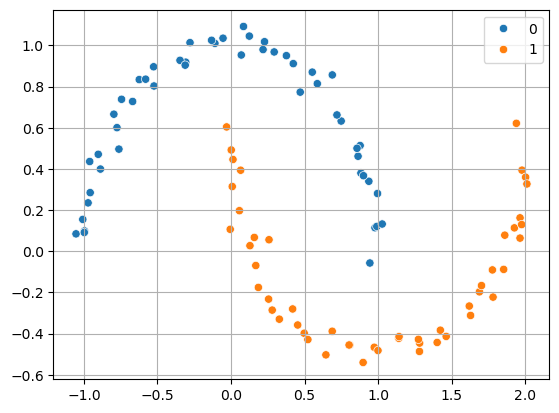

In [85]:
import seaborn as sns
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.05, random_state=30)

plt.grid()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y);

In [86]:
from sklearn.preprocessing import PolynomialFeatures

scaler = StandardScaler()
polynomier = PolynomialFeatures()
SVM = LinearSVC(C=10, loss='hinge')

poly_SVM = Pipeline([
    ('poly', polynomier),
    ('scaler', scaler),
    ('SVM', SVM)
])

In [87]:
poly_SVM.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', StandardScaler()),
                ('SVM', LinearSVC(C=10, loss='hinge'))])

------

In [97]:
y_pred = poly_SVM.predict(X)

In [99]:
y_decision = poly_SVM.decision_function(X)

In [104]:
y_decision

array([-1.06505993e+00,  1.89716485e+00, -1.59973611e+00, -1.33217740e+00,
       -6.59921270e-01,  3.66261559e+00, -1.13568718e+00,  2.84421515e+00,
        4.21833182e+00,  2.37402953e+00,  3.66661153e+00, -1.71405547e+00,
        1.12769365e+00,  3.55974551e+00, -1.59354596e+00,  2.63887925e+00,
        2.87599540e+00,  1.62627304e+00, -7.86804955e-01, -7.28016761e-01,
        1.68145629e+00, -3.35921459e-01, -1.26080861e+00,  3.37998785e+00,
        4.19304317e-01,  2.68708282e+00,  3.91701900e+00, -1.24391727e+00,
        3.37449003e+00, -1.00908718e+00,  1.48795754e+00, -1.50926825e+00,
        1.70823230e+00,  2.77623365e+00, -1.25914153e+00, -1.42731929e+00,
       -1.11615240e+00,  4.51421796e-01, -2.11612015e-02, -1.52877463e+00,
       -1.21583386e+00, -1.18342286e-01, -1.14773924e+00,  3.93667024e+00,
       -1.05826822e+00, -1.68024044e+00,  1.80387943e+00, -8.20823398e-01,
        3.13710306e+00, -7.27770452e-01, -1.69980903e+00, -4.02271474e-01,
        7.74282116e-01, -

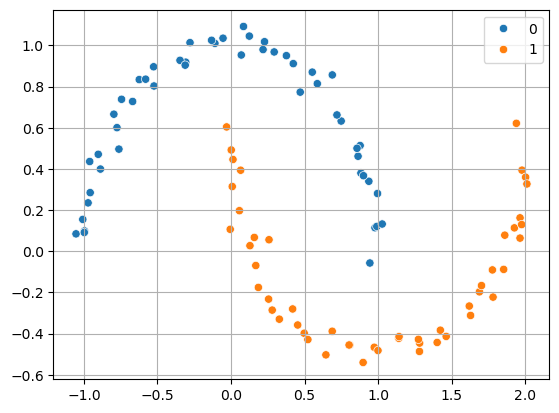

In [149]:
plt.grid()
plt.plot()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y);

In [114]:
x_ = np.array([1, 2, 3])
y_ = np.array([1, 2, 3])
mesh = np.meshgrid(x_, y_)
mesh

[array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])]

In [116]:
x_ = np.array([1, 2, 3])
y_ = np.array([7, 5, 6, 8])
mesh = np.meshgrid(x_, y_)
mesh

[array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[7, 7, 7],
        [5, 5, 5],
        [6, 6, 6],
        [8, 8, 8]])]

In [124]:
mesh[0].ravel()

array([1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3])

In [129]:
X_ = np.c_[x0.ravel(), x1.ravel()]
X_

array([[-1.5       , -1.        ],
       [-1.45959596, -1.        ],
       [-1.41919192, -1.        ],
       ...,
       [ 2.41919192,  1.5       ],
       [ 2.45959596,  1.5       ],
       [ 2.5       ,  1.5       ]])

In [132]:
np.hstack([x0.ravel().reshape(-1, 1), x1.ravel().reshape(-1, 1)])

array([[-1.5       , -1.        ],
       [-1.45959596, -1.        ],
       [-1.41919192, -1.        ],
       ...,
       [ 2.41919192,  1.5       ],
       [ 2.45959596,  1.5       ],
       [ 2.5       ,  1.5       ]])

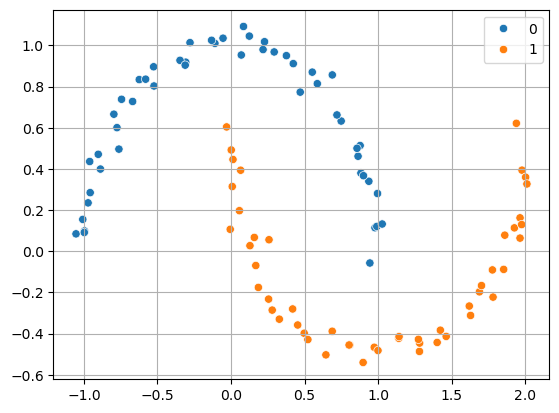

In [150]:
plt.grid()
plt.plot()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y);

# Test

In [177]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)
